In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Catalogues/NGC1027_5.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.623957,59.703399,464340188661593472,0.8678,0.3916,2.502,-0.567,2.437,95,NaN,...,1.001,19.757400,21.037899,18.698357,2.339542,NaN,41.214907,41.623962,59.703388,0.893857
1,41.526110,59.663305,464340390525839616,0.8485,0.2780,3.447,-3.042,1.622,95,NaN,...,0.991,19.291763,20.494804,18.243275,2.251530,NaN,41.197618,41.526137,59.663297,0.867277
2,41.201628,59.656903,464342520829593344,1.0068,0.0660,4.342,-2.224,3.729,31,1.360,...,1.052,16.880320,17.795835,15.946208,1.849627,NaN,41.256803,41.201648,59.656886,1.039312
3,41.232326,59.705194,464342903081036416,1.0499,0.5364,4.949,-3.707,3.279,95,NaN,...,1.091,19.948261,20.885586,18.634525,2.251060,NaN,41.294932,41.232358,59.705180,1.072682
4,41.462683,59.710449,464343693356691584,0.9441,0.8736,3.393,-1.366,3.106,95,NaN,...,1.144,20.509865,21.450420,19.443134,2.007286,NaN,41.253587,41.462695,59.710435,0.989440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,40.110682,63.534996,515662844529779712,0.9504,0.5817,2.250,-1.597,1.585,95,NaN,...,1.036,20.335096,20.963730,19.283390,1.680340,NaN,45.001656,40.110698,63.534989,0.990722
4104,39.879872,63.562059,515663737882709504,0.9108,0.1520,3.135,-1.317,2.845,31,1.349,...,1.047,18.463370,19.455551,17.507929,1.947622,NaN,45.070410,39.879885,63.562046,0.932990
4105,39.926834,63.580962,515664081480440448,0.9778,0.4284,1.968,-0.710,1.835,95,NaN,...,1.003,20.067148,20.842766,19.177397,1.665369,NaN,45.078426,39.926841,63.580954,1.009689
4106,40.138478,63.544578,515664360654018432,1.0549,0.3833,3.333,-3.219,0.864,95,NaN,...,1.008,19.755924,20.753645,18.861647,1.891998,NaN,45.004979,40.138510,63.544575,1.080472


In [4]:
data2 = data[["RAJ2000", "DEJ2000","pmRA", "pmDE", "Gmag", "BP-RP", "Plx"]].copy()

In [5]:
# Contar quantas linhas têm pelo menos um NaN nas colunas selecionadas
nan_rows = data2.isna().sum(axis=1) > 0
num_nan_rows = nan_rows.sum()

# Exibir o número total de linhas com NaN
print(f"Linhas com pelo menos um NaN: {num_nan_rows}")

Linhas com pelo menos um NaN: 113


In [6]:
data2_clean = data2.dropna()

In [8]:
#Obtendo apenas as features que vamos utilizar
df1 = data2_clean[["RAJ2000", "DEJ2000","pmRA", "pmDE", "BP-RP", "Plx"]].copy()
# Remover linhas com NaN
df1_clean = df1

In [9]:
#obtendo apenas os valores para normalizar
X = df1_clean.values

In [10]:
# Normalizar os dados 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X_scaled)  # Obtendo os rótulos dos clusters

In [12]:
# Adicionando os clusters ao DataFrame
df1_clean.loc[:, 'Cluster'] = cluster

In [13]:
# Verificando a distribuição dos clusters
print(df1_clean['Cluster'].value_counts())

Cluster
4    888
2    885
0    778
3    764
1    680
Name: count, dtype: int64


In [14]:
# Verificando a média das features por cluster
print(df1_clean.groupby('Cluster').mean())

           RAJ2000    DEJ2000      pmRA      pmDE     BP-RP       Plx
Cluster                                                              
0        38.870608  62.472549 -2.190294  1.577455  1.863103  0.899644
1        41.594992  61.319031 -2.577031  0.870106  1.898346  0.948110
2        40.545423  62.127860 -1.032797  1.919357  1.782394  0.995059
3        40.920583  60.980964 -1.799720  2.570844  1.984168  0.895929
4        40.970418  61.803508 -1.475715  1.887153  1.253140  0.869174


In [15]:
df2 = data2_clean.assign(cluster=df1_clean["Cluster"])

In [16]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

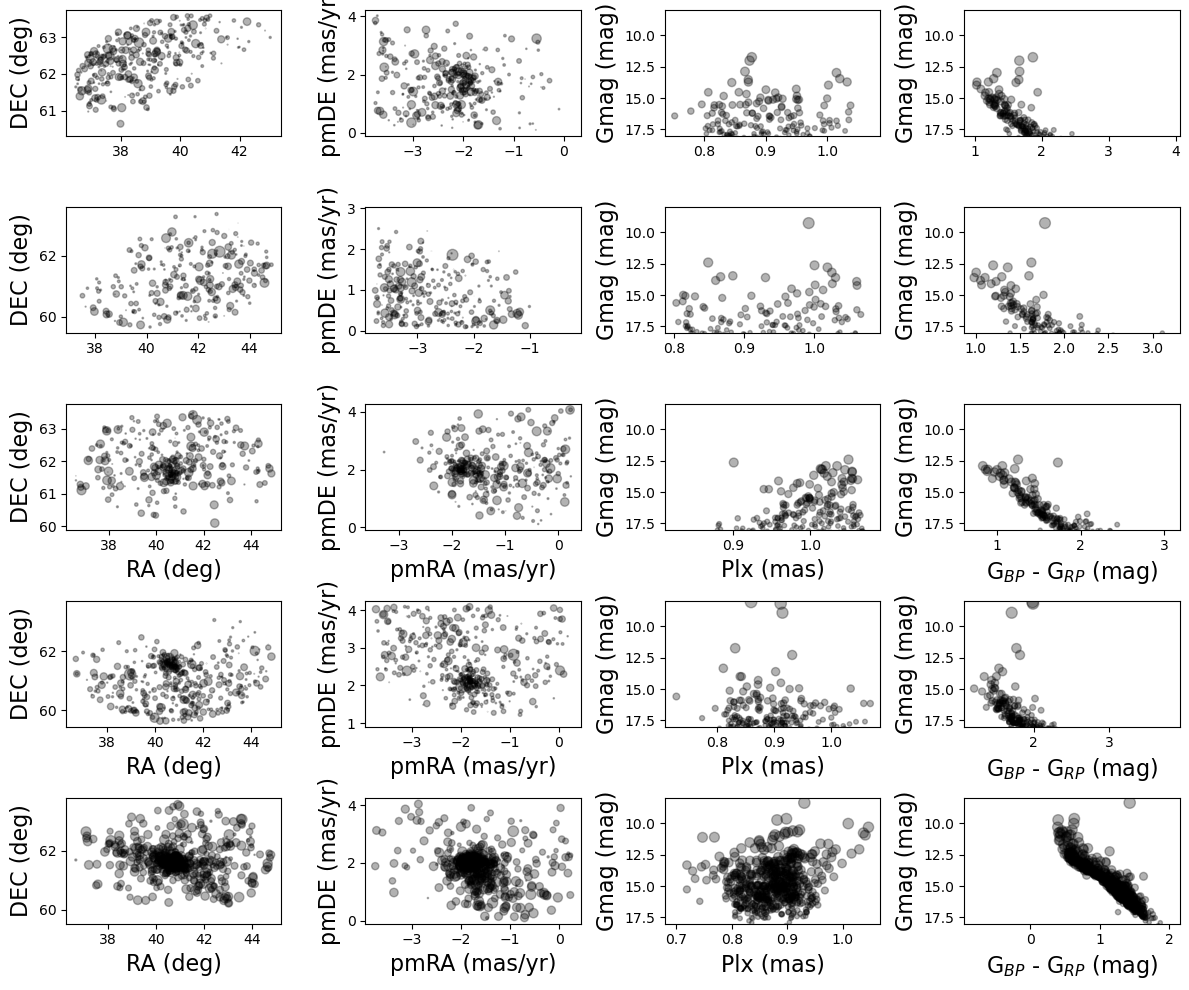

In [17]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)

In [19]:
print(df2.groupby('cluster').mean())

           RAJ2000    DEJ2000      pmRA      pmDE       Gmag     BP-RP  \
cluster                                                                  
0        38.870608  62.472549 -2.190294  1.577455  19.233024  1.863103   
1        41.594992  61.319031 -2.577031  0.870106  19.269466  1.898346   
2        40.545423  62.127860 -1.032797  1.919357  19.273832  1.782394   
3        40.920583  60.980964 -1.799720  2.570844  18.999947  1.984168   
4        40.970418  61.803508 -1.475715  1.887153  16.726129  1.253140   

              Plx  
cluster            
0        0.899644  
1        0.948110  
2        0.995059  
3        0.895929  
4        0.869174  


In [20]:
# a1.to_csv('Catalogues/pop1_NGC1027_Kmeans1.csv', index=False) 
# a2.to_csv('Catalogues/pop2_NGC1027_Kmeans1.csv', index=False) 
# a3.to_csv('Catalogues/pop3_NGC1027_Kmeans1.csv', index=False) 
# a4.to_csv('Catalogues/pop4_NGC1027_Kmeans1.csv', index=False) 
# a5.to_csv('Catalogues/pop5_NGC1027_Kmeans1.csv', index=False) 